# Project3

In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from torchvision.transforms import ToTensor
torch.set_default_dtype(torch.float64)

In [2]:
train_data = torchvision.datasets.FashionMNIST('./train/', train=True, download=True, transform=ToTensor())
test_data = torchvision.datasets.FashionMNIST('./test/', train=False, download=True, transform=ToTensor())


Extracting ./train/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./train/FashionMNIST/raw




Extracting ./train/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./train/FashionMNIST/raw




Extracting ./train/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./train/FashionMNIST/raw




Extracting ./train/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./train/FashionMNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)



Extracting ./test/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./test/FashionMNIST/raw




Extracting ./test/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./test/FashionMNIST/raw




Extracting ./test/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./test/FashionMNIST/raw




Extracting ./test/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./test/FashionMNIST/raw

Processing...
Done!


In [3]:
%%bash
python --version

Python 3.7.10


In [4]:
print(torch.__version__)

1.8.1+cu101


In [5]:
if torch.cuda.is_available():
  device = 'cuda:0'
else:
  device = 'cpu'

In [6]:
device

'cuda:0'

In [41]:
# Hyperparameter
batch_size = 64
learning_rate = 1e-3
epochs = 100

In [42]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
#test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)

# Fully Connected Network

In [43]:
# Fully Connected Network
# input shape : (channel, height, width) of input image
# output shape : # class dimension vector
# You can adjust # of hidden layers and units per layer
class FC(torch.nn.Module):
  def __init__(self, num_in):
    super(FC, self).__init__()
    self.flatten = torch.nn.Flatten()
    self.fc1 = torch.nn.Linear(num_in, 512)
    self.fc2 = torch.nn.Linear(512,256)
    self.fc3 = torch.nn.Linear(256,128)
    self.output = torch.nn.Linear(128,10)

  def forward(self, x):
    x = self.flatten(x)
    
    x = torch.nn.functional.relu(self.fc1(x))
    x = torch.nn.functional.relu(self.fc2(x))
    x = torch.nn.functional.relu(self.fc3(x))

    x = self.output(x)
    return x

In [44]:
# Train
# Define loss function, optimizer
# print loss periodically
# ex) [1, 500] loss: 0.5765465737434
FCN = FC(28*28*1)
FCN = FCN.to(device)
#LeNet = LeNet5(32*32*1)
optimizer = torch.optim.Adam(FCN.parameters(), lr=learning_rate)
loss_function = torch.nn.CrossEntropyLoss()
loss_list = []
for epoch in range(epochs):
  temporal_loss = 0.0
  num_minibatches = 0
  for idx, feature in enumerate(train_loader):
    x, y = feature
    x = x.to(device)
    y = y.to(device)
    optimizer.zero_grad()

    y_pred = FCN(x)

    loss = loss_function(y_pred, y)

    loss.backward()

    temporal_loss += loss.item()
    num_minibatches += 1

    optimizer.step()
  loss_list.append(temporal_loss / num_minibatches)
  print("[%d, %d] loss: %.4f" %(epoch+1, epochs, temporal_loss / num_minibatches))

[1, 100] loss: 0.5185
[2, 100] loss: 0.3650
[3, 100] loss: 0.3277
[4, 100] loss: 0.3035
[5, 100] loss: 0.2843
[6, 100] loss: 0.2683
[7, 100] loss: 0.2545
[8, 100] loss: 0.2452
[9, 100] loss: 0.2302
[10, 100] loss: 0.2226
[11, 100] loss: 0.2155
[12, 100] loss: 0.2059
[13, 100] loss: 0.1966
[14, 100] loss: 0.1908
[15, 100] loss: 0.1796
[16, 100] loss: 0.1787
[17, 100] loss: 0.1710
[18, 100] loss: 0.1654
[19, 100] loss: 0.1590
[20, 100] loss: 0.1542
[21, 100] loss: 0.1482
[22, 100] loss: 0.1463
[23, 100] loss: 0.1389
[24, 100] loss: 0.1356
[25, 100] loss: 0.1361
[26, 100] loss: 0.1273
[27, 100] loss: 0.1244
[28, 100] loss: 0.1228
[29, 100] loss: 0.1163
[30, 100] loss: 0.1118
[31, 100] loss: 0.1091
[32, 100] loss: 0.1123
[33, 100] loss: 0.1036
[34, 100] loss: 0.1001
[35, 100] loss: 0.1048
[36, 100] loss: 0.0980
[37, 100] loss: 0.0985
[38, 100] loss: 0.0906
[39, 100] loss: 0.0907
[40, 100] loss: 0.0886
[41, 100] loss: 0.0833
[42, 100] loss: 0.0907
[43, 100] loss: 0.0803
[44, 100] loss: 0.08

In [45]:
# Test
# print accuracy of the test dataset
# ex) Accuracy of the network on the 10000 test images: 83 %
with torch.no_grad():  
  correct = 0
  for x, y in test_data:    
    x = x.to(device)    
    
    y_pred = FCN(x)

    _, predicted = torch.max(y_pred.data, 1)    
    correct += (predicted == y)
  accuracy = correct / len(test_data)
  print("Accuracy of the network on the %d test images: %d %%" %(len(test_data), accuracy * 100))

Accuracy of the network on the 10000 test images: 89 %


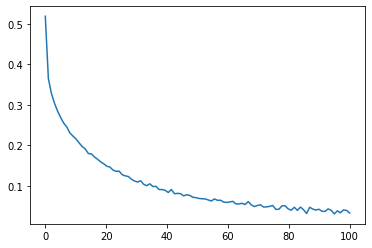

In [46]:
step = np.linspace(0, epochs, epochs)
plt.plot(step, np.array(loss_list))

# LeNet-5

In [47]:
# LeNet-5
# input shape : (32, 32, 1) --> need to use padding
# You don't have to do feature map selection at Layer3
class LeNet5(torch.nn.Module):
  def __init__(self):
    super(LeNet5, self).__init__()
    self.flatten = torch.nn.Flatten()

    self.c1 = torch.nn.Conv2d(1, 6, 5, padding=2)
    self.s2 = torch.nn.MaxPool2d(2)
    self.c3 = torch.nn.Conv2d(6, 16, 5)
    self.s4 = torch.nn.MaxPool2d(2)
    self.c5 = torch.nn.Conv2d(16, 120, 5)
    self.f6 = torch.nn.Linear(120, 84)

    self.output = torch.nn.Linear(84,10)

  def forward(self, x):    
    x = torch.nn.functional.relu(self.c1(x))    
    x = torch.nn.functional.relu(self.s2(x))    
    x = torch.nn.functional.relu(self.c3(x))    
    x = torch.nn.functional.relu(self.s4(x))    
    x = torch.nn.functional.relu(self.c5(x))    
    x = self.flatten(x)    
    x = torch.nn.functional.relu(self.f6(x))    

    x = self.output(x)    
    return x

In [49]:
# Task 2 Parameters
# 1. Optimizier parameter --> adjust parameter related with optimizer and compare the result
# 2. Loss function --> use different loss function and compare the result
# 3. Batch size --> use different batch size and compare the result
# 4. Be creative and analytical --> change other hyperparameter or model elements
LeNet = LeNet5()
LeNet = LeNet.to(device)

# optimizer parameters: learning rate(default: 1e-3), betas(default: (0.9, 0.999)), weight decay(default: 0)
learning_rate = 1e-3 # 1e-3 vs 1e-4
bt = (0.9, 0.999) # (0.9, 0.999) vs (0.8, 0.900)
wd = 0 # 0 vs 1e-3
optimizer = torch.optim.Adam(LeNet.parameters(), lr=learning_rate, betas=bt, weight_decay=wd)

# loss_function: nn.CrossEntropyLoss(), nn.NLLLoss(), nn.KLDivLoss()
loss_function = torch.nn.CrossEntropyLoss()

# batch_size: 64, 128, 256
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Initialization: xavier_uniform_, xavier_normal_
def initialization(m):
  if type(m) == torch.nn.Linear:
    torch.nn.init.xavier_normal_(m.weight)
#LeNet.apply(initialization)
# Activation: ReLU, GELU, LeakyReLU

In [50]:
# Train
# Define loss function, optimizer
# print loss periodically
# ex) [1, 500] loss: 0.5765465737434
loss_list_L = []
for epoch in range(epochs):
  temporal_loss = 0.0
  num_minibatches = 0
  for idx, feature in enumerate(train_loader):
    x, y = feature
    x = x.to(device)
    y = y.to(device)
    optimizer.zero_grad()

    y_pred = LeNet(x)

    loss = loss_function(y_pred, y)

    #y_pred = torch.nn.functional.softmax(y_pred, dim=-1)
    #new_y = []
    #for label in y:
    #  temp = [0,] * 10
    #  temp[label] = 1
    #  new_y.append(temp)
    #loss = loss_function(y_pred, torch.Tensor(new_y).to(device))

    loss.backward()

    temporal_loss += loss.item()
    num_minibatches += 1

    optimizer.step()
  loss_list_L.append(temporal_loss / num_minibatches)
  print("[%d, %d] loss: %.4f" %(epoch+1, epochs, temporal_loss / num_minibatches))

[1, 100] loss: 0.6757
[2, 100] loss: 0.4253
[3, 100] loss: 0.3611
[4, 100] loss: 0.3262
[5, 100] loss: 0.2984
[6, 100] loss: 0.2772
[7, 100] loss: 0.2610
[8, 100] loss: 0.2472
[9, 100] loss: 0.2341
[10, 100] loss: 0.2222
[11, 100] loss: 0.2123
[12, 100] loss: 0.2012
[13, 100] loss: 0.1911
[14, 100] loss: 0.1846
[15, 100] loss: 0.1753
[16, 100] loss: 0.1683
[17, 100] loss: 0.1624
[18, 100] loss: 0.1520
[19, 100] loss: 0.1451
[20, 100] loss: 0.1383
[21, 100] loss: 0.1331
[22, 100] loss: 0.1261
[23, 100] loss: 0.1194
[24, 100] loss: 0.1169
[25, 100] loss: 0.1109
[26, 100] loss: 0.1060
[27, 100] loss: 0.0995
[28, 100] loss: 0.0959
[29, 100] loss: 0.0908
[30, 100] loss: 0.0873
[31, 100] loss: 0.0839
[32, 100] loss: 0.0800
[33, 100] loss: 0.0742
[34, 100] loss: 0.0749
[35, 100] loss: 0.0694
[36, 100] loss: 0.0692
[37, 100] loss: 0.0623
[38, 100] loss: 0.0645
[39, 100] loss: 0.0578
[40, 100] loss: 0.0639
[41, 100] loss: 0.0616
[42, 100] loss: 0.0527
[43, 100] loss: 0.0506
[44, 100] loss: 0.05

In [51]:
# Test
# print accuracy of the test dataset
# ex) Accuracy of the network on the 10000 test images: 83 %
with torch.no_grad():  
  correct = 0
  for x, y in test_data:    
    x = x.to(device)    
    
    y_pred = LeNet(torch.unsqueeze(x,0))

    _, predicted = torch.max(y_pred.data, 1)    
    correct += (predicted == y)
  accuracy = correct / len(test_data)
  print("Accuracy of the network on the %d test images: %d %%" %(len(test_data), accuracy * 100))

Accuracy of the network on the 10000 test images: 89 %


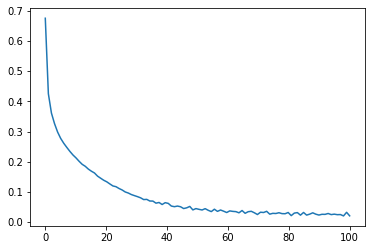

In [52]:
step = np.linspace(0, epochs, epochs)
plt.plot(step, np.array(loss_list_L))